# Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
import statsmodels.formula.api as sm
import scipy.stats as stats
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import seaborn as sns

# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [3]:
data_df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes") #Reading the data 


In [4]:
# data_df

In [5]:
data_df=data_df.drop('Unnamed: 0',axis=1)

In [6]:
data_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [7]:
data_df.describe().T #Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
data_df.isnull().sum() #checking null values (No null values)

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
dups=data_df.duplicated()

In [11]:
print("Total no of duplicate values = ",dups.sum())


Total no of duplicate values =  8


In [12]:
data_df[dups] # which 8 values are duplicate here.

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [13]:
data_df.shape

(1525, 9)

In [14]:
print("The no of rows ",data_df.shape[0])
print("The no of colums ",data_df.shape[1])

The no of rows  1525
The no of colums  9


In [15]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
           print(feature.upper(),data_df[feature].nunique())
          
           print(data_df[feature].value_counts().sort_values())
            

VOTE 2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER 2
male      713
female    812
Name: gender, dtype: int64


In [16]:
data_df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

# 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [36]:
data_df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

UNIVARIATE CATAEGORICAL DONE UNDER 1.2

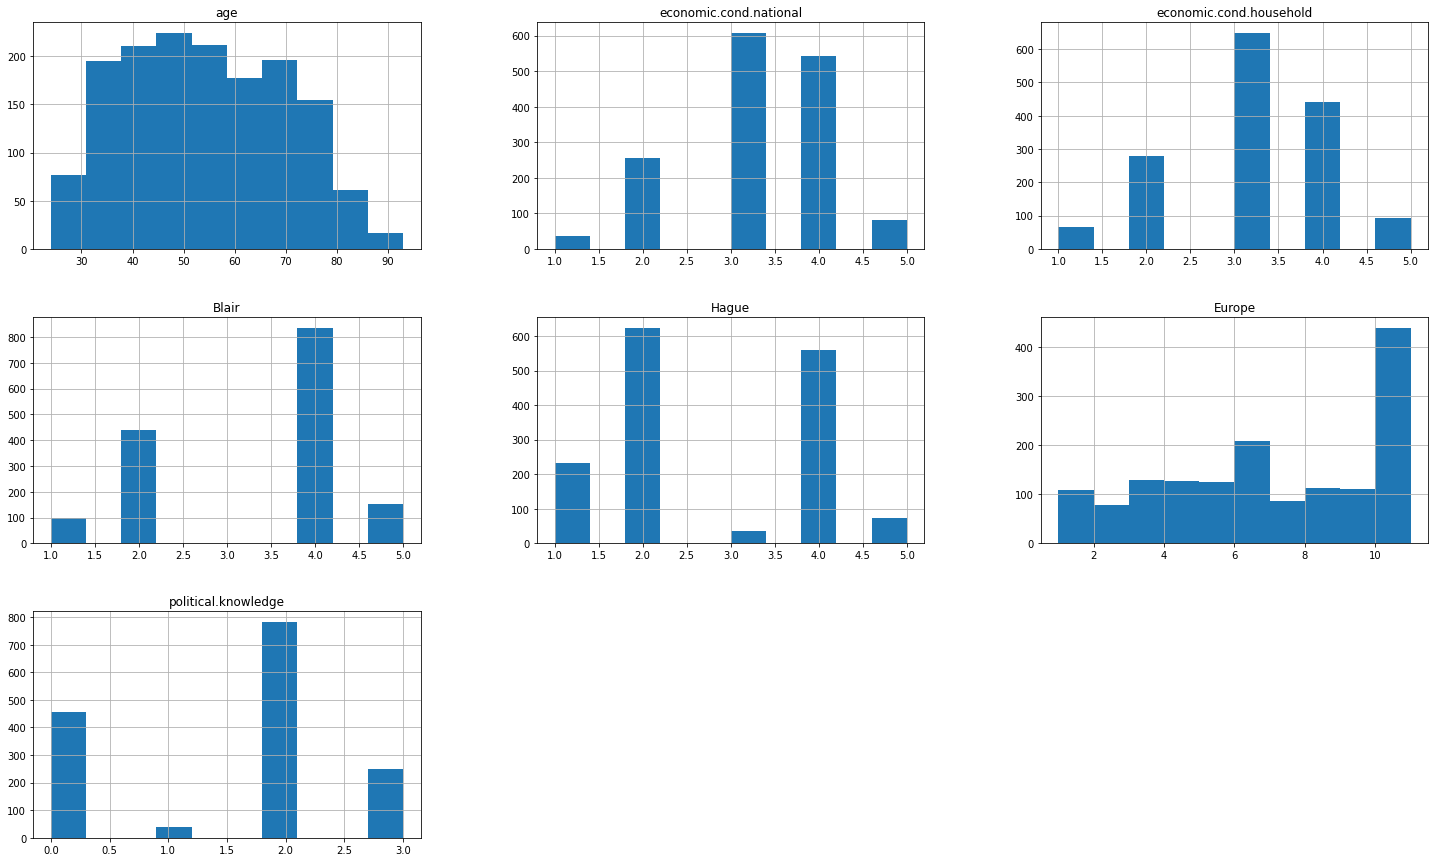

In [35]:
data_df.hist(figsize=(25,15));

Text(0.5, 1.0, 'political knowledge Boxplot')

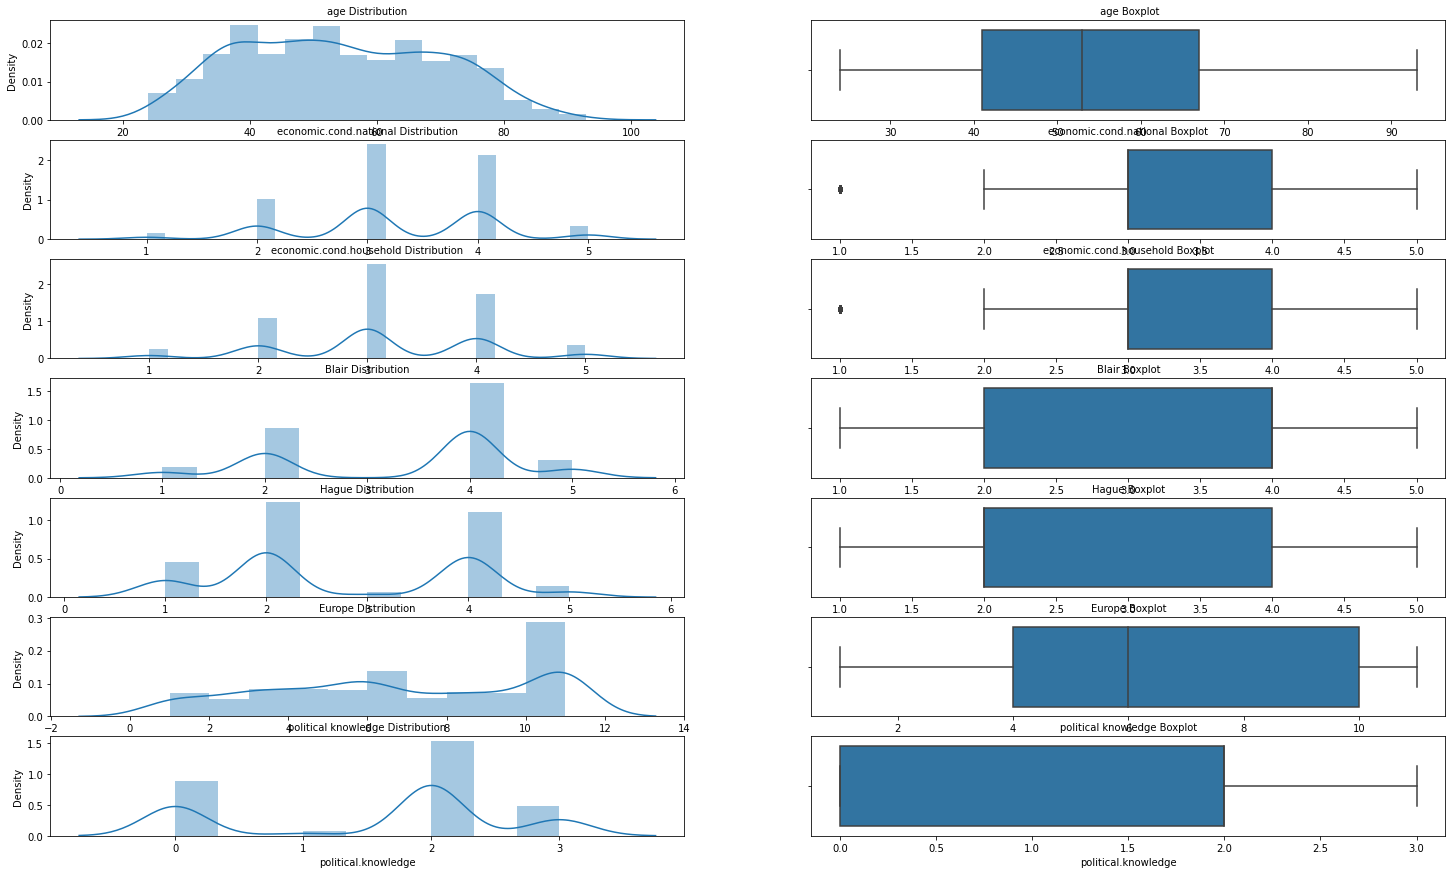

In [54]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(25,15)

a = sns.distplot(data_df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)
a = sns.boxplot(data_df['age'] , orient = "v" , ax=axes[0][1])
a.set_title(" age Boxplot",fontsize=10)



a = sns.distplot(data_df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)
a = sns.boxplot(data_df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(data_df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)
a = sns.boxplot(data_df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(data_df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)
a = sns.boxplot(data_df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)


a = sns.distplot(data_df['Hague'] , ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=10)
a = sns.boxplot(data_df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=10)


a = sns.distplot(data_df['Europe'] , ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=10)
a = sns.boxplot(data_df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(data_df['political.knowledge'] , ax=axes[6][0])
a.set_title("political knowledge Distribution",fontsize=10)
a = sns.boxplot(data_df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political knowledge Boxplot",fontsize=10)


In [ ]:
#two of the variables has outliers .. 

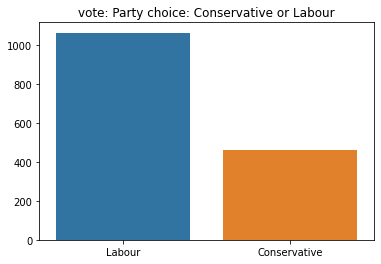

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64


In [56]:
sns.barplot(data_df.vote.value_counts().index,data_df.vote.value_counts().values)
plt.title("vote: Party choice: Conservative or Labour")
plt.show()
print(data_df.vote.value_counts(normalize=True))

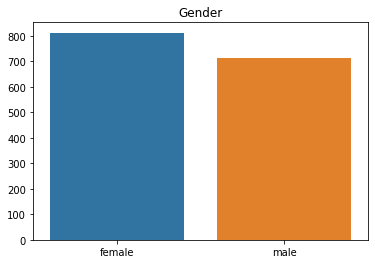

female    0.532459
male      0.467541
Name: gender, dtype: float64


In [57]:
sns.barplot(data_df.gender.value_counts().index,data_df.gender.value_counts().values)
plt.title("Gender")
plt.show()
print(data_df.gender.value_counts(normalize=True))

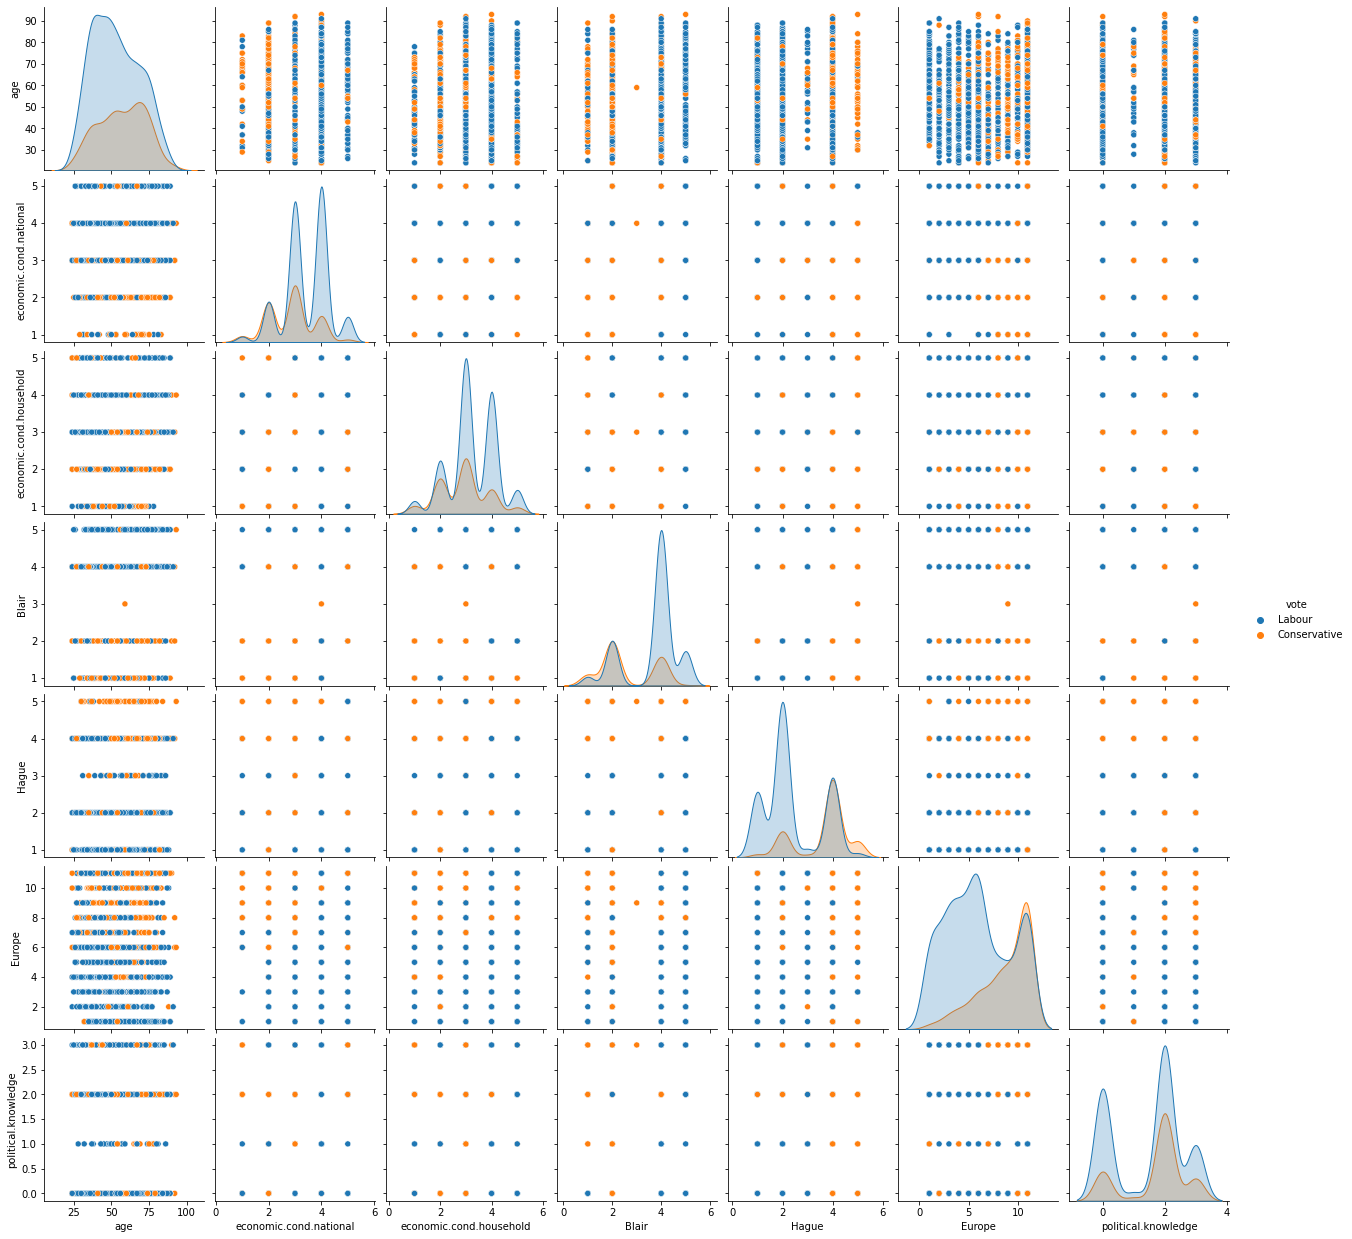

In [58]:
sns.pairplot(data_df,hue="vote")

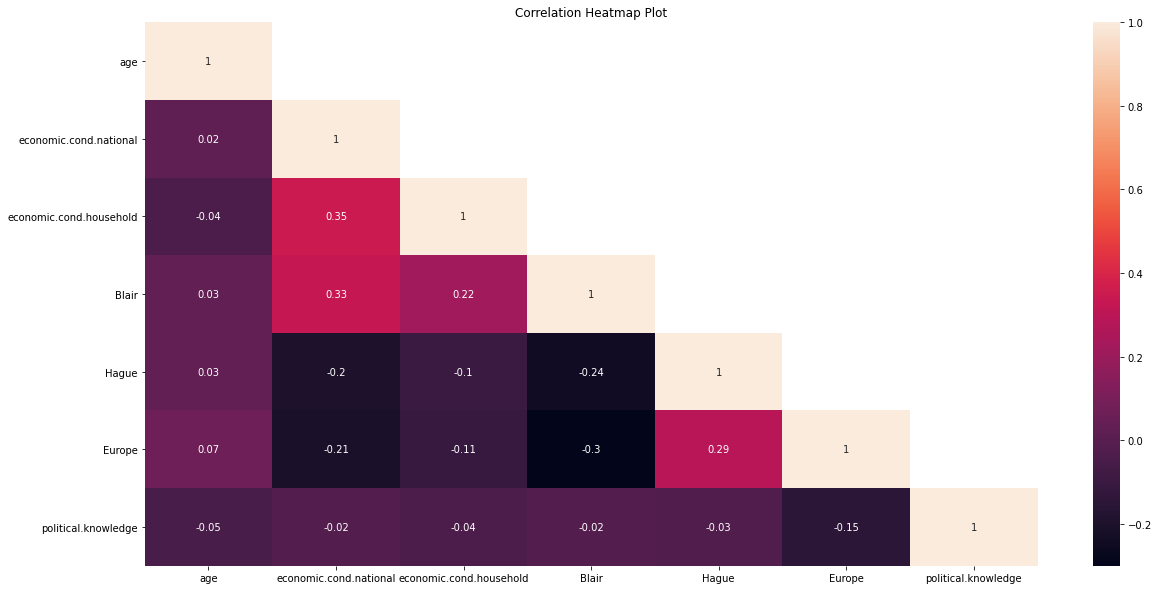

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(round(data_df.corr(),2), annot=True,mask=np.triu(data_df.corr(),+1));
plt.title('Correlation Heatmap Plot')
plt.show()

Text(0.5, 1.0, 'vote vs economic.cond.national')

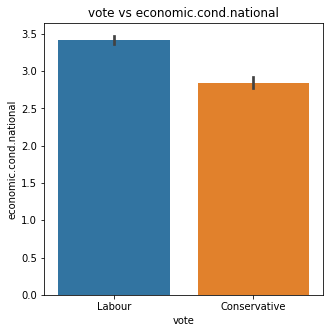

In [60]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='vote', y='economic.cond.national',data=data_df)
plt.title("vote vs economic.cond.national")

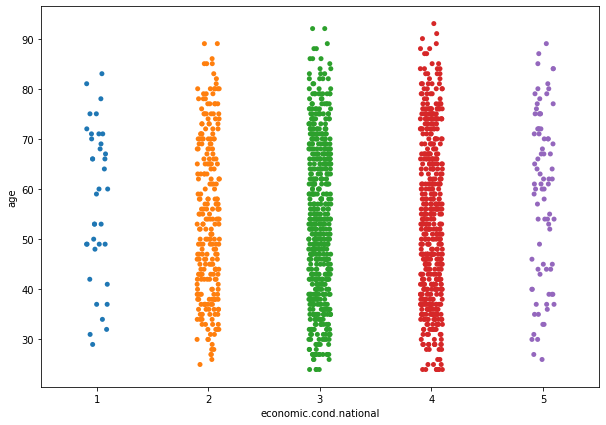

In [62]:
plt.figure(figsize=(10,7))
sns.stripplot(data_df["economic.cond.national"], data_df["age"], jitter=True) 
plt.show()

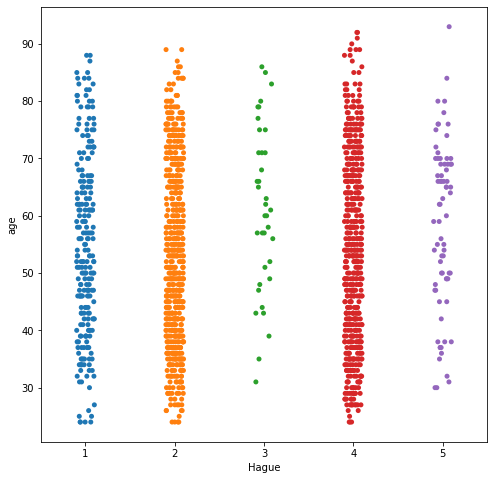

In [63]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["Hague"], data_df['age'], jitter=True) 
plt.show()

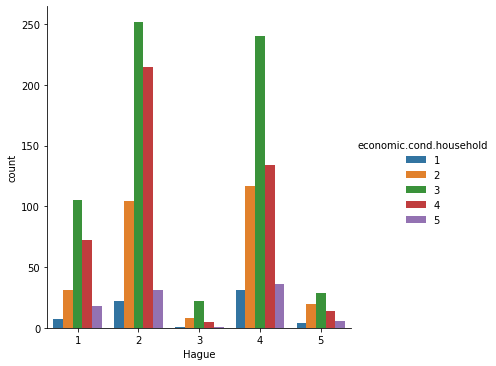

In [64]:
#Catplot Analysis - Hague(count) on economic.cond.household
sns.catplot(x="Hague", kind="count",hue='economic.cond.household',data=data_df)

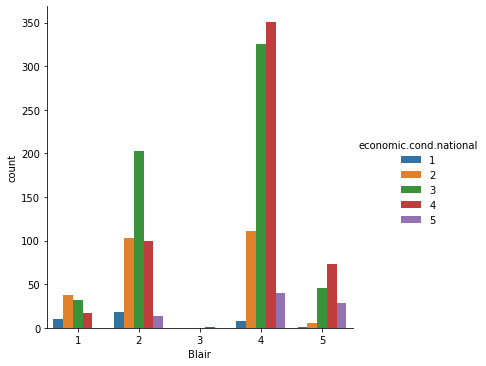

In [65]:
#Catplot Analysis - Blair(count) on economic.cond.national
sns.catplot(x="Blair", kind="count",hue='economic.cond.national',data=data_df)

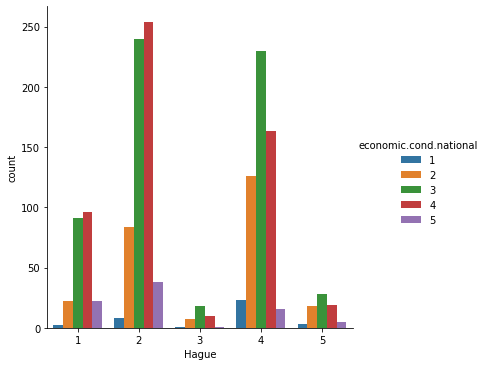

In [66]:
#Catplot Analysis - Hague(count) on economic.cond.national
sns.catplot(x="Hague", kind="count",hue='economic.cond.national',data=data_df)

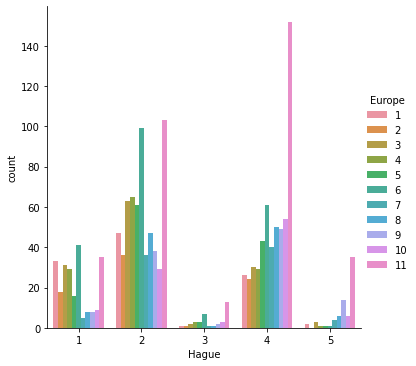

In [67]:
#Catplot Analysis - Hague(count) on Europe
sns.catplot(x="Hague", kind="count",hue='Europe',data=data_df)

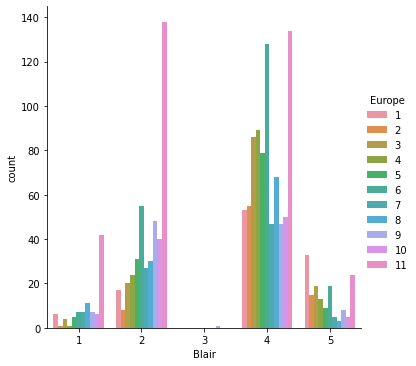

In [68]:
sns.catplot(x="Blair", kind="count",hue='Europe',data=data_df)

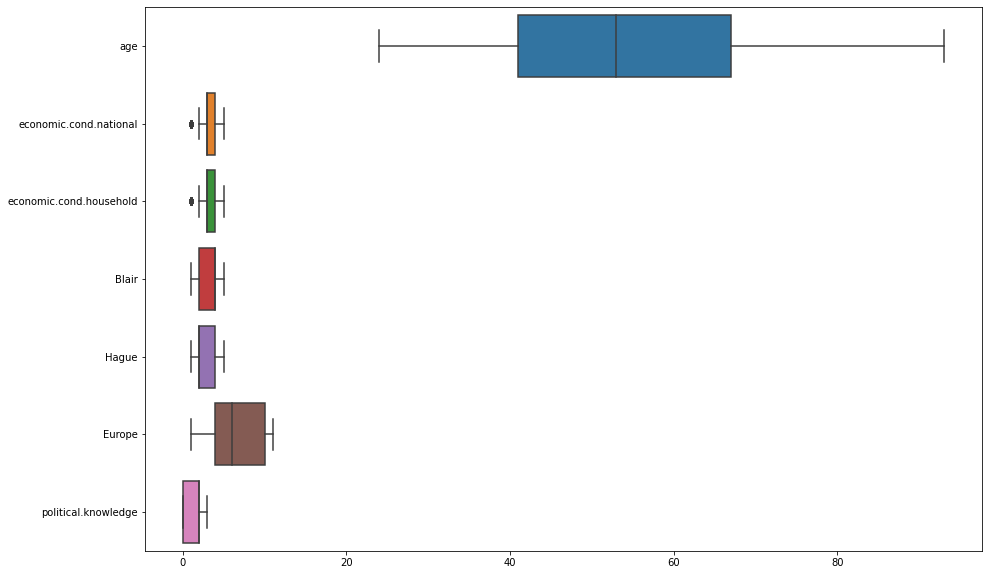

In [69]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=data_df,orient="h")
plt.show()

In [73]:
col=data_df.columns

In [74]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [75]:
dtypes=data_df.dtypes[(data_df.dtypes!= 'object')].index
for column in data_df[dtypes].columns:
    lr,ur=remove_outlier(data_df[column])
    data_df[column]=np.where(data_df[column]>ur,ur,data_df[column])
    data_df[column]=np.where(data_df[column]<lr,lr,data_df[column])

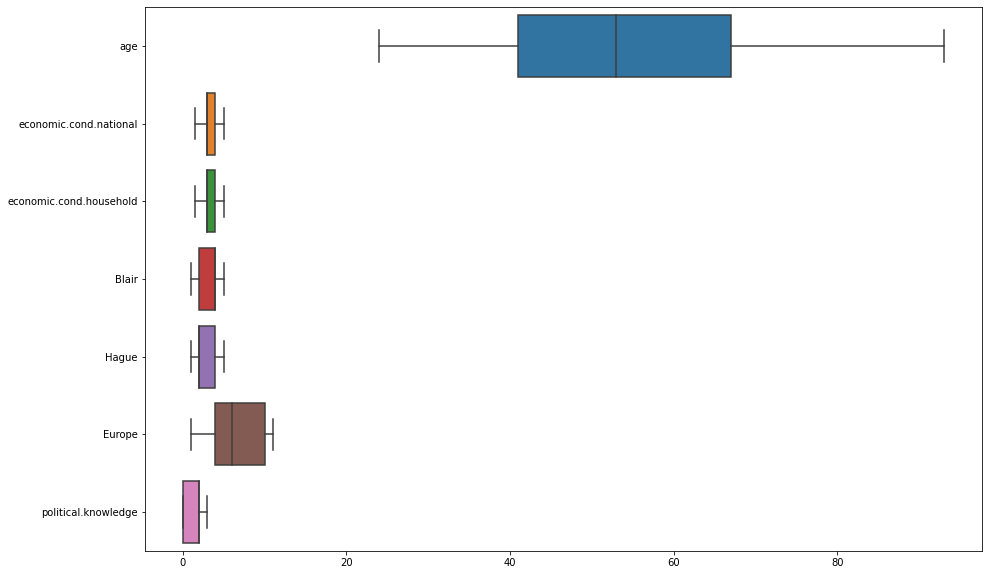

In [85]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=data_df,orient="h")
plt.show()

In [87]:
display(data_df.dtypes)

vote                        object
age                        float64
economic.cond.national     float64
economic.cond.household    float64
Blair                      float64
Hague                      float64
Europe                     float64
political.knowledge        float64
gender                      object
dtype: object

In [89]:
data_df['age'] = data_df['age'].astype('int64')
data_df['economic.cond.national'] = data_df['economic.cond.national'].astype('int64')
data_df['economic.cond.household'] = data_df['economic.cond.household'].astype('int64')
data_df['Blair'] = data_df['Blair'].astype('int64')
data_df['Hague'] = data_df['Hague'].astype('int64')
data_df['Europe'] = data_df['Europe'].astype('int64')
data_df['political.knowledge'] = data_df['political.knowledge'].astype('int64')

In [90]:
display(data_df.dtypes)

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

# 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [91]:
#Converting Object variables to categorical variables:
for feature in data_df.columns: 
    if data_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data_df[feature].unique()))
        print(pd.Categorical(data_df[feature].unique()).codes)
        data_df[feature] = pd.Categorical(data_df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [92]:
data_df.vote.value_counts(normalize=True)

1    0.697049
0    0.302951
Name: vote, dtype: float64

In [93]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int8 
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


In [94]:
# Converting int8 to int64 variables
data_df['vote'] = data_df['vote'].astype('int64')
data_df['gender'] = data_df['gender'].astype('int64')

In [95]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int64
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int64
dtypes: int64(9)
memory usage: 107.4 KB


In [ ]:
# all the variables are converted into int64 datatype for model prediction

In [96]:
data_df_copy = data_df.copy()
data_df_copy.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [97]:
X = data_df.drop('vote', axis=1)

y = data_df[['vote']]

In [98]:
#Applying Z score scaling on Variable X - To be used in specific algorithms 
age1=['age']
X_scaled=X.copy()
y_new = y.copy()
X_scaled[age1] = X_scaled[age1].apply(lambda x:(x-x.mean()) / (x.std()))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [100]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)


The training set for the independent variables: (1067, 8)
The training set for the dependent variable: (1067, 1)
The test set for the independent variables: (458, 8)
The test set for the dependent variable: (458, 1)


In [101]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_scaled, y_new, test_size=0.30 , random_state=1)

In [102]:
print('The training set for the independent variables:',X_trains.shape)
print('The training set for the dependent variable:',y_trains.shape)
print('The test set for the independent variables:',X_tests.shape)
print('The test set for the dependent variable:',y_tests.shape)

The training set for the independent variables: (1067, 8)
The training set for the dependent variable: (1067, 1)
The test set for the independent variables: (458, 8)
The test set for the dependent variable: (458, 1)


In [ ]:
#spilting the dataset into train and test set to build Logistic regression and LDA model (70:30)
# X_train :70% of data randomly chosen from the 8 columns .These are training independent variables
# X_test :30% of data randomly chosen from the 8 columns .These are test independent variables
# y_train :70% of data randomly chosen from the "vote" column .These are training dependent variables
# y_test :30% of data randomly chosen from the "vote" columns.These are test ndependent variables

# 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

# Logistic Regression Model

In [ ]:
# Logistic regression is a fundamental classification technique.It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression.
# It is the go-to method for binary classification problems (problems with two class values).
# two library is used
# 1.sklearn
# 2.statsmodel

# logistic regression before scaling

In [103]:
# Fit the Logistic Regression model
modellr = LogisticRegression()
modellr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#We now fit our model to the logistic regression model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.

# Predicting on Training and Test dataset

In [104]:
ytrain_predictlr = modellr.predict(X_train)
ytest_predictlr = modellr.predict(X_test)

# Getting the Predicted Classes and Probs

In [105]:
ytest_predict_problr=modellr.predict_proba(X_test)
pd.DataFrame(ytest_predict_problr).head()

,0,1
0,0.932419,0.067581
1,0.688709,0.311291
2,0.334635,0.665365
3,0.477267,0.522733
4,0.159659,0.840341


# Model Evaluation

In [106]:
modellr.score(X_train, y_train)

0.8397375820056232

In [107]:
modellr.score(X_test, y_test)

0.8231441048034934

# Applying GridSearchCV for Logistic Regression

In [108]:
grid1={'penalty':['l2','none'],
      'solver':['newton-cg',  'saga'],
      'max_iter':[10000,100000],
      'tol':[0.0001,0.001]
     }

In [109]:
modellr1 = LogisticRegression()

In [110]:
grid_searchlr = GridSearchCV(estimator = modellr1, param_grid = grid1, cv = 3,n_jobs=-1,scoring='accuracy')

In [112]:
grid_searchlr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000, 100000], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'saga'],
                         'tol': [0.0001, 0.001]},
             scoring='accuracy')

In [113]:
print(grid_searchlr.best_params_,'\n')
print(grid_searchlr.best_estimator_)

{'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, solver='newton-cg')


In [114]:
best_modellr = grid_searchlr.best_estimator_

# Prediction

In [115]:
ytrain_predictlr = best_modellr.predict(X_train)
ytest_predictlr = best_modellr.predict(X_test)

# The probabilities on the test set

In [116]:
ytrain_predict_problr=best_modellr.predict_proba(X_train)
pd.DataFrame(ytrain_predict_problr).head()

,0,1
0,0.614904,0.385096
1,0.187476,0.812524
2,0.190163,0.809837
3,0.164022,0.835978
4,0.053384,0.946616


In [117]:
ytest_predict_problr=best_modellr.predict_proba(X_test)
pd.DataFrame(ytest_predict_problr).head()


,0,1
0,0.932007,0.067993
1,0.688387,0.311613
2,0.333625,0.666375
3,0.476424,0.523576
4,0.159520,0.840480


In [118]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train= best_modellr.score(X_train, y_train)
accuracy_lr_train

0.8397375820056232

In [119]:
accuracy_lr_test= best_modellr.score(X_test, y_test)
accuracy_lr_test

0.8231441048034934

In [120]:
#Finding the Intercept of the Final Model 
print("The intercept for the model is :",best_modellr.intercept_)

The intercept for the model is : [3.41372291]


In [121]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_modellr.coef_[0][idx]))


The coefficient for age is -0.02061149603608451
The coefficient for economic.cond.national is 0.33511260131867593
The coefficient for economic.cond.household is 0.1586947887622719
The coefficient for Blair is 0.5714163761002934
The coefficient for Hague is -0.832124018843385
The coefficient for Europe is -0.23715909065832222
The coefficient for political.knowledge is -0.4775201244813325
The coefficient for gender is 0.2881911839338333


In [ ]:
#The coefficients for each of the independent attributes
# The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
# economic.cond.national have more positive coeffiecient . A positive coefficient indicates that as the value of the independent variable increases, the mean of the

Feature: 0, Score: -0.02061
Feature: 1, Score: 0.33511
Feature: 2, Score: 0.15869
Feature: 3, Score: 0.57142
Feature: 4, Score: -0.83212
Feature: 5, Score: -0.23716
Feature: 6, Score: -0.47752
Feature: 7, Score: 0.28819


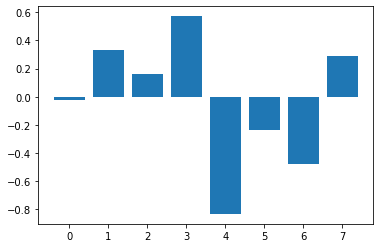

In [122]:
#Feature Importance Graphs
importance = best_modellr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [123]:
# concatenate X and y into a single dataframe
data_train1 = pd.concat([X_train, y_train], axis=1)
data_test1=pd.concat([X_test,y_test],axis=1)
data_train1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote
1453,62,3,3,2,2,11,2,0,1
275,49,3,3,2,2,8,0,0,0
1130,74,4,4,4,4,7,0,1,1
1153,57,2,3,4,2,6,2,0,1
1172,24,4,5,4,4,6,0,1,0


# logistic regression after scaling

In [124]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_trains, y_trains)

LogisticRegression()

In [ ]:
#We now fit our model to the logistic regression model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.

# Predicting on Training and Test dataset

In [ ]:
ytrain_predict = model.predict(X_trains)
ytest_predict = model.predict(X_tests)

# Getting the Predicted Classes and Probs

In [125]:
ytest_predict_prob=model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.932034,0.067966
1,0.689060,0.310940
2,0.333709,0.666291
3,0.477391,0.522609
4,0.159836,0.840164


# Model Evaluation

In [128]:
# Accuracy - Training Data
model.score(X_trains, y_trains)

0.8397375820056232

In [127]:
model.score(X_tests, y_tests)


0.8231441048034934

# Applying GridSearchCV for Logistic Regression

In [131]:
grid={'penalty':['l2'],
      'solver':['saga'],
      'max_iter':[1000,100],
      'tol':[0.00001,0.001]
     }

In [132]:
model1 = LogisticRegression()

In [133]:
grid_search = GridSearchCV(estimator = model1, param_grid = grid, cv = 7,n_jobs=-1,scoring='accuracy')


In [134]:
grid_search.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [1000, 100], 'penalty': ['l2'],
                         'solver': ['saga'], 'tol': [1e-05, 0.001]},
             scoring='accuracy')

In [135]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)


{'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001} 

LogisticRegression(max_iter=1000, solver='saga', tol=0.001)


In [136]:
best_model = grid_search.best_estimator_

# Prediction on the training and test set

In [137]:
ytrain_predictlr1 = best_model.predict(X_trains)
ytest_predictlr1 = best_model.predict(X_tests)

In [138]:
# The probabilities on the test set

In [139]:
ytrain_predict_prob1=best_model.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob1).head()


,0,1
0,0.620313,0.379687
1,0.203781,0.796219
2,0.181892,0.818108
3,0.174803,0.825197
4,0.050110,0.949890


In [140]:
ytest_predict_prob1=best_model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.937942,0.062058
1,0.683460,0.316540
2,0.346059,0.653941
3,0.469925,0.530075
4,0.170748,0.829252


In [141]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train= best_model.score(X_trains, y_trains)
accuracy_lr_train

0.8369259606373008

In [142]:
accuracy_lr_test= best_model.score(X_tests, y_tests)
accuracy_lr_test

0.8187772925764192

In [143]:
#Finding the Intercept of the Final Model 
print("The intercept for the model is :",best_model.intercept_)

The intercept for the model is : [1.82487507]


In [144]:
for idx, col_name in enumerate(X_trains.columns):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[0][idx]))


The coefficient for age is -0.32311950578305737
The coefficient for economic.cond.national is 0.3705500461575461
The coefficient for economic.cond.household is 0.18426332559911296
The coefficient for Blair is 0.5903754842901937
The coefficient for Hague is -0.8030618697561771
The coefficient for Europe is -0.22596192192401993
The coefficient for political.knowledge is -0.45422950725957156
The coefficient for gender is 0.2995084518202849


Feature: 0, Score: -0.32312
Feature: 1, Score: 0.37055
Feature: 2, Score: 0.18426
Feature: 3, Score: 0.59038
Feature: 4, Score: -0.80306
Feature: 5, Score: -0.22596
Feature: 6, Score: -0.45423
Feature: 7, Score: 0.29951


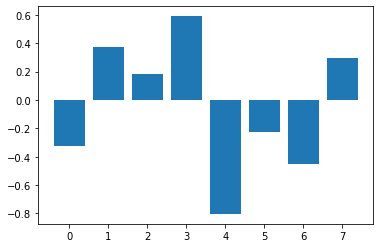

In [145]:
#Feature Importance Graphs
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [146]:
#Using GridsearchCV, we input various parameters like 'max_iter', 'penalty',solver', 'tol' which will helps us to find best grid for prediction of the better model
#max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.
#solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
#penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.
#bestgrid:{'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 1e-05}
#Accuracy score of training data:83.5%
#Accuracy score of test data:83.5%

In [147]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_trains, y_trains], axis=1)
data_test=pd.concat([X_tests,y_tests],axis=1)
data_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote
1453,0.497588,3,3,2,2,11,2,0,1
275,-0.329847,3,3,2,2,8,0,0,0
1130,1.261374,4,4,4,4,7,0,1,1
1153,0.179344,2,3,4,2,6,2,0,1
1172,-1.921068,4,5,4,4,6,0,1,0


In [148]:
import statsmodels.api as sm 

In [149]:
log_reg = sm.Logit(y_trains, X_trains).fit()


Optimization terminated successfully.
         Current function value: 0.388126
         Iterations 7


In [150]:
print(log_reg.summary()) 


                           Logit Regression Results                           
Dep. Variable:                   vote   No. Observations:                 1067
Model:                          Logit   Df Residuals:                     1059
Method:                           MLE   Df Model:                            7
Date:                Sat, 19 Mar 2022   Pseudo R-squ.:                  0.3740
Time:                        16:41:11   Log-Likelihood:                -414.13
converged:                       True   LL-Null:                       -661.56
Covariance Type:            nonrobust   LLR p-value:                1.020e-102
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.3401      0.089     -3.802      0.000      -0.515      -0.165
economic.cond.national      0.5181      0.101      5.125      0.000       0.320       0.716


# LDA

In [151]:
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_trains,y_trains)

# Prediction

In [152]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_lda = model_lda.predict(X_trains)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_lda = model_lda.predict(X_tests)

In [153]:
ytrain_predict_problda1=model_lda.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_problda1).head()

,0,1
0,0.646067,0.353933
1,0.160884,0.839116
2,0.183504,0.816496
3,0.132531,0.867469
4,0.039819,0.960181


In [154]:
ytest_predict_problda1=model_lda.predict_proba(X_tests)
pd.DataFrame(ytest_predict_problda1).head()

,0,1
0,0.952522,0.047478
1,0.741265,0.258735
2,0.328720,0.671280
3,0.486416,0.513584
4,0.139250,0.860750


In [155]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lda_train= model_lda.score(X_trains, y_trains)
accuracy_lda_train

0.8369259606373008

In [156]:
accuracy_lda_test= model_lda.score(X_tests, y_tests)
accuracy_lda_test

0.8187772925764192

In [ ]:
# GRIDSEARCHCV

In [157]:
grid_lda={
      'solver':['svd', 'lsqr', 'eigen'],
      
     }

In [158]:
model_lda = LinearDiscriminantAnalysis()

In [159]:
grid_search_lda = GridSearchCV(estimator = model_lda, param_grid = grid_lda, cv = 7,n_jobs=-1,scoring='accuracy')

In [160]:
grid_search_lda.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [161]:
print(grid_search_lda.best_params_,'\n')
print(grid_search_lda.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [162]:
best_model_lda = grid_search_lda.best_estimator_

In [163]:
ytrain_predictlda = best_model_lda.predict(X_trains)
ytest_predictlda = best_model_lda.predict(X_tests)

In [164]:
# Training Data Class Prediction with a cut-off value of 0.5
# Test Data Class Prediction with a cut-off value of 0.5

In [165]:
ytrain_predictlda

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [166]:
ytrain_predict_problda=best_model_lda.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_problda).head()

,0,1
0,0.646067,0.353933
1,0.160884,0.839116
2,0.183504,0.816496
3,0.132531,0.867469
4,0.039819,0.960181


In [167]:
ytest_predict_problda=best_model_lda.predict_proba(X_tests)
pd.DataFrame(ytest_predict_problda).head()

,0,1
0,0.952522,0.047478
1,0.741265,0.258735
2,0.328720,0.671280
3,0.486416,0.513584
4,0.139250,0.860750


In [168]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lda_train= best_model_lda.score(X_trains, y_trains)
accuracy_lda_train

0.8369259606373008

In [169]:
accuracy_lda_test= best_model_lda.score(X_tests, y_tests)
accuracy_lda_test

0.8187772925764192

# 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [171]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors = 15)
KNN_model.fit(X_trains,y_trains)

KNeighborsClassifier(n_neighbors=15)

In [172]:
KNN_model.score(X_trains,y_trains)

0.8434864104967198

In [173]:
KNN_model.score(X_tests,y_tests)

0.8275109170305677

In [174]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trains, y_trains)
    # evaluate test accuracy
    scores = knn.score(X_tests, y_tests)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2379912663755459,
 0.20960698689956336,
 0.19650655021834063,
 0.19432314410480345,
 0.18558951965065507,
 0.18122270742358082,
 0.1746724890829694,
 0.17248908296943233,
 0.1834061135371179,
 0.1834061135371179]

# Plot misclassification error vs k (with k value on X-axis) using matplotlib

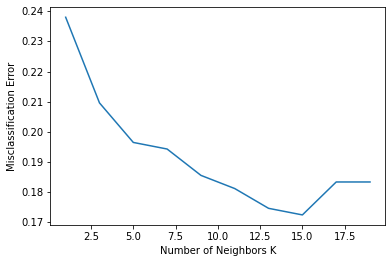

In [175]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [176]:
## Performance Matrix on train data set
y_train_predict_knn = KNN_model.predict(X_trains)
acc_train_knn = KNN_model.score(X_trains, y_trains)
print(acc_train_knn)
print(metrics.confusion_matrix(y_trains, y_train_predict_knn))
print(metrics.classification_report(y_trains, y_train_predict_knn))

0.8434864104967198
[[237  95]
 [ 72 663]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [177]:
## Performance Matrix on test data set
y_test_predict_knn = KNN_model.predict(X_tests)
acc_test_knn = KNN_model.score(X_tests, y_tests)
print(acc_test_knn)
print(metrics.confusion_matrix(y_tests, y_test_predict_knn))
print(metrics.classification_report(y_tests, y_test_predict_knn))

0.8275109170305677
[[ 92  38]
 [ 41 287]]
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [178]:
ytrain_predict_prob_knn=KNN_model.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_knn).head()

,0,1
0,0.600000,0.400000
1,0.333333,0.666667
2,0.133333,0.866667
3,0.066667,0.933333
4,0.066667,0.933333


In [179]:
ytest_predict_prob_knn=KNN_model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_knn).head()

,0,1
0,0.800000,0.200000
1,0.866667,0.133333
2,0.133333,0.866667
3,0.266667,0.733333
4,0.133333,0.866667


# KNN with gridsearchcv

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
grid_knn={'n_neighbors':[ 5,7,10,15],
      'weights': ['uniform','distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']      
      }

In [191]:
model_knn = KNeighborsClassifier()

In [192]:
grid_search_knn = GridSearchCV(estimator = model_knn, param_grid = grid_knn,n_jobs=-1, cv = 7,scoring='accuracy')

In [193]:
grid_search_knn.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [194]:
print(grid_search_knn.best_params_,'\n')

{'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'distance'} 



In [195]:
print(grid_search_knn.best_estimator_)

KNeighborsClassifier(algorithm='brute', n_neighbors=10, weights='distance')


In [196]:
grid_search_knn.score(X_trains,y_trains)

0.9990627928772259

In [197]:
grid_search_knn.score(X_tests,y_tests)

0.8122270742358079

# Gaussian Naive Bayes

In [198]:
from sklearn.naive_bayes import GaussianNB

In [199]:
NB_model = GaussianNB()
NB_model.fit(X_trains, y_trains)

GaussianNB()

In [200]:
y_train_predict_nb = NB_model.predict(X_trains)
acc_train_nb = NB_model.score(X_trains, y_trains)                      ## Accuracy
print(acc_train_nb)
print(metrics.confusion_matrix(y_trains, y_train_predict_nb))          ## confusion_matrix
print(metrics.classification_report(y_trains, y_train_predict_nb))      ## classification_report

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [201]:
## Performance Matrix on test data set
y_test_predict_nb = NB_model.predict(X_tests)
acc_test_nb = NB_model.score(X_tests, y_tests)                    ## Accuracy
print(acc_test_nb)
print(metrics.confusion_matrix(y_tests, y_test_predict_nb))         ## confusion_matrix
print(metrics.classification_report(y_tests, y_test_predict_nb))     ## classification_report

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



# 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

# Bagging with randomforest

In [206]:
model_rf=RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=101)
model_bag=BaggingClassifier(base_estimator=model_rf,n_estimators=101,random_state=1)
model_bag.fit(X_trains, y_trains)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                        max_features=5,
                                                        min_samples_leaf=25,
                                                        min_samples_split=50,
                                                        n_estimators=101),
                  n_estimators=101, random_state=1)

In [207]:
y_train_predict_bag = model_bag.predict(X_trains)

In [208]:
y_test_predict_bag = model_bag.predict(X_tests)


In [209]:
acc_bag_train =model_bag.score(X_trains, y_trains)
acc_bag_train

0.8359887535145267

In [210]:
acc_bag_test =model_bag.score(X_tests, y_tests)
acc_bag_test

0.8165938864628821

In [211]:
ytrain_predict_prob_bag=model_bag.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_bag).head()

,0,1
0,0.471364,0.528636
1,0.313726,0.686274
2,0.345166,0.654834
3,0.128110,0.871890
4,0.160473,0.839527


In [212]:
ytest_predict_prob_bag=model_bag.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_bag).head()

,0,1
0,0.780111,0.219889
1,0.785020,0.214980
2,0.207929,0.792071
3,0.347034,0.652966
4,0.314477,0.685523


# AdaBoostClassifier

In [213]:
from sklearn.ensemble import AdaBoostClassifier


ADa_model = AdaBoostClassifier(n_estimators=100,random_state=1, learning_rate=1.0, algorithm='SAMME.R')
ADa_model.fit(X_trains,y_trains)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [214]:
y_train_predict_Ada = ADa_model.predict(X_trains)


In [215]:
y_test_predict_Ada = ADa_model.predict(X_tests)


In [216]:
ADa_train =ADa_model.score(X_trains, y_trains)
ADa_train

0.8472352389878163

In [217]:
ADa_test=ADa_model.score(X_tests, y_tests)
ADa_test

0.8187772925764192

# GridSearchCV ADA boosting


In [218]:
grid_ADa={'n_estimators':[51,101,151],"learning_rate":[1.0,0.001,0.01,0.2,0.3], "algorithm":["SAMME.R"]}

In [219]:
model_ADa = AdaBoostClassifier()

In [220]:
grid_search_ADa = GridSearchCV(estimator = model_ADa, param_grid = grid_ADa, cv = 7,n_jobs=-1,scoring='accuracy')

In [221]:
grid_search_ADa.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
                         'n_estimators': [51, 101, 151]},
             scoring='accuracy')

In [222]:
print(grid_search_ADa.best_params_,'\n')
print(grid_search_ADa.best_estimator_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 151} 

AdaBoostClassifier(learning_rate=0.2, n_estimators=151)


In [223]:
best_model_ADa = grid_search_ADa.best_estimator_

In [224]:
ytrain_predict_ADa = best_model_ADa.predict(X_trains)
ytest_predict_ADa = best_model_ADa.predict(X_tests)

In [225]:
ytrain_predict_prob_ADa=best_model_ADa.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_ADa).head()

,0,1
0,0.507082,0.492918
1,0.493435,0.506565
2,0.489977,0.510023
3,0.489038,0.510962
4,0.496081,0.503919


In [226]:
ytest_predict_prob_ADa=best_model_ADa.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_ADa).head()

,0,1
0,0.515603,0.484397
1,0.509824,0.490176
2,0.497409,0.502591
3,0.499906,0.500094
4,0.490884,0.509116


In [227]:
# Accuracy - Training Data
# Training Accuracy
accuracy_ADa_train= best_model_ADa.score(X_trains, y_trains)
accuracy_ADa_train

0.8434864104967198

In [228]:
accuracy_ADa_test= best_model_ADa.score(X_tests, y_tests)
accuracy_ADa_test

0.8187772925764192

In [229]:
ytrain_predict_prob_ada=best_model_ADa.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_ada).head()

,0,1
0,0.507082,0.492918
1,0.493435,0.506565
2,0.489977,0.510023
3,0.489038,0.510962
4,0.496081,0.503919


In [230]:
ytrain_predict_prob_ada=best_model_ADa.predict_proba(X_tests)
pd.DataFrame(ytrain_predict_prob_ada).head()

,0,1
0,0.515603,0.484397
1,0.509824,0.490176
2,0.497409,0.502591
3,0.499906,0.500094
4,0.490884,0.509116


# Gradient Boosting

In [231]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(criterion = 'friedman_mse',loss='exponential',max_features=5,
                                min_samples_split=50,n_estimators=101,random_state=1)
gbcl = gbcl.fit(X_trains, y_trains)

In [232]:
y_train_predict_gbcl = gbcl.predict(X_trains)

In [233]:
y_test_predict_gbcl = gbcl.predict(X_tests)

In [234]:
gbcl.score(X_trains, y_trains)

0.8697282099343955

In [235]:
gbcl.score(X_tests, y_tests)

0.8187772925764192

In [236]:
grid_gbcl={"criterion" : ['friedman_mse',"mse"],"loss":['exponential'],"max_features":[5,6,7],
                                "min_samples_split":[50,40,30],"n_estimators":[101,51]}

In [237]:
model_gbcl = GradientBoostingClassifier()

In [238]:
grid_search_gbcl = GridSearchCV(estimator = model_gbcl, param_grid = grid_gbcl, cv = 7,n_jobs=-1,scoring='accuracy')

In [239]:
grid_search_gbcl.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'loss': ['exponential'], 'max_features': [5, 6, 7],
                         'min_samples_split': [50, 40, 30],
                         'n_estimators': [101, 51]},
             scoring='accuracy')

In [240]:
print(grid_search_gbcl.best_params_,'\n')
print(grid_search_gbcl.best_estimator_)

{'criterion': 'mse', 'loss': 'exponential', 'max_features': 6, 'min_samples_split': 50, 'n_estimators': 51} 

GradientBoostingClassifier(criterion='mse', loss='exponential', max_features=6,
                           min_samples_split=50, n_estimators=51)


In [241]:
best_model_gbcl = grid_search_gbcl.best_estimator_

In [242]:
ytrain_predict_gbcl = best_model_gbcl.predict(X_trains)
ytest_predict_gbcl = best_model_gbcl.predict(X_tests)

In [243]:
ytrain_predict_prob_gbcl=best_model_gbcl.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_gbcl).head()

,0,1
0,0.666601,0.333399
1,0.294602,0.705398
2,0.172143,0.827857
3,0.182579,0.817421
4,0.207914,0.792086


In [244]:
ytest_predict_prob_gbcl=best_model_gbcl.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_gbcl).head()

,0,1
0,0.865302,0.134698
1,0.861115,0.138885
2,0.204126,0.795874
3,0.207006,0.792994
4,0.276934,0.723066


In [245]:
# Accuracy - Training Data
# Training Accuracy
accuracy_gbcl_train= best_model_gbcl.score(X_trains, y_trains)
accuracy_gbcl_train

0.865979381443299

In [246]:
accuracy_gbcl_test= best_model_gbcl.score(X_tests, y_tests)
accuracy_gbcl_test

0.8296943231441049

# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

# Logistic Regression Model

In [247]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [248]:
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

# Confusion matrix on the training and test data

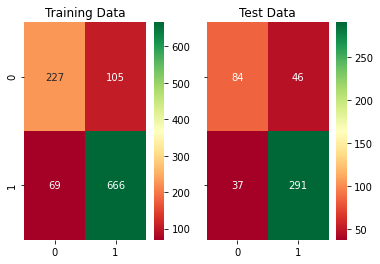

In [249]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,ytrain_predictlr1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,ytest_predictlr1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Classification Report of training and test data

In [250]:
print(classification_report(y_trains, ytrain_predictlr1),'\n');
print(classification_report(y_tests, ytest_predictlr1),'\n');

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       332
           1       0.86      0.91      0.88       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067
 

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       130
           1       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



# AUC and ROC for the training data

AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


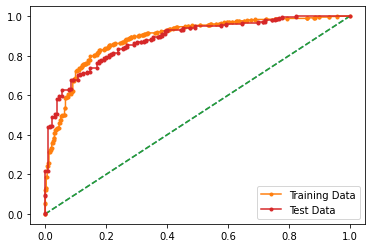

In [251]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr = metrics.roc_auc_score(y_trains,ytrain_predict_prob1[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains,ytrain_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr = metrics.roc_auc_score(y_tests,ytest_predict_prob1[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [252]:
metrics=classification_report(y_trains, ytrain_predictlr1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lr=round(df.loc["1"][0],2)
train_recall_lr=round(df.loc["1"][1],2)
train_f1_lr=round(df.loc["1"][2],2)
print ('LR_train_precision ',train_precision_lr)
print ('LR_train_recall ',train_recall_lr)
print ('LR_train_f1 ',train_f1_lr)

LR_train_precision  0.86
LR_train_recall  0.91
LR_train_f1  0.88


In [253]:
metrics=classification_report(y_tests, ytest_predictlr1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lr=round(df.loc["1"][0],2)
test_recall_lr=round(df.loc["1"][1],2)
test_f1_lr=round(df.loc["1"][2],2)
print ('LR_test_precision ',test_precision_lr)
print ('LR_test_recall ',test_recall_lr)
print ('LR_test_f1 ',test_f1_lr)

LR_test_precision  0.86
LR_test_recall  0.89
LR_test_f1  0.88


# LinearDiscriminantAnalysis

In [255]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [256]:
metrics=classification_report(y_trains,pred_class_train_lda,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lda=round(df.loc["1"][0],2)
train_recall_lda=round(df.loc["1"][1],2)
train_f1_lda=round(df.loc["1"][2],2)
print ('LDA_train_precision ',train_precision_lda)
print ('LDA_train_recall ',train_recall_lda)
print ('LDA_train_f1 ',train_f1_lda)

LDA_train_precision  0.87
LDA_train_recall  0.9
LDA_train_f1  0.88


In [257]:
metrics=classification_report(y_tests,pred_class_test_lda,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lda=round(df.loc["1"][0],2)
test_recall_lda=round(df.loc["1"][1],2)
test_f1_lda=round(df.loc["1"][2],2)
print ('LDA_test_precision ',test_precision_lda)
print ('LDA_test_recall ',test_recall_lda)
print ('LDA_test_f1 ',test_f1_lda)

LDA_test_precision  0.87
LDA_test_recall  0.88
LDA_test_f1  0.87


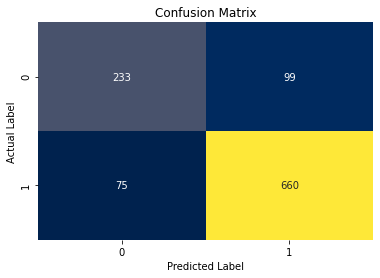

In [258]:
confusion_matrix(y_trains,pred_class_train_lda)
sns.heatmap(confusion_matrix(y_trains,pred_class_train_lda),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

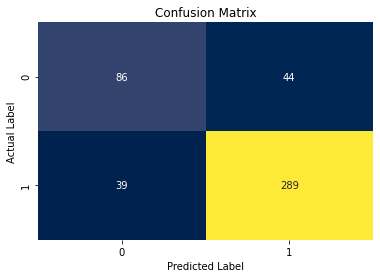

In [262]:
confusion_matrix(y_tests,pred_class_test_lda)
sns.heatmap(confusion_matrix(y_tests,pred_class_test_lda),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

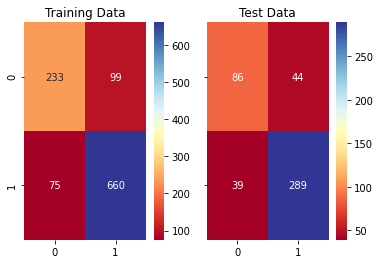

In [266]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,pred_class_train_lda)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,pred_class_test_lda)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [267]:
print(classification_report(y_trains, pred_class_train_lda),'\n');
print(classification_report(y_tests,pred_class_test_lda),'\n');

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067
 

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



AUC for the Training Data: 0.889
AUC for the Test Data: 0.884


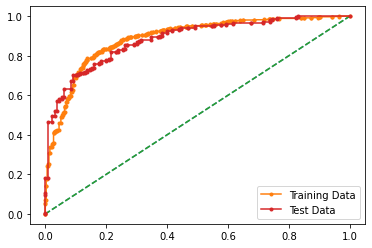

In [268]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lda  = metrics.roc_auc_score(y_trains, ytrain_predict_problda[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_problda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lda = metrics.roc_auc_score(y_tests,ytest_predict_problda[:,1])
print('AUC for the Test Data: %.3f' % test_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_problda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# KNN Model

In [271]:
metrics=classification_report(y_trains,y_train_predict_knn,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_knn=round(df.loc["1"][0],2)
train_recall_knn=round(df.loc["1"][1],2)
train_f1_knn=round(df.loc["1"][2],2)
print ('knn_train_precision ',train_precision_knn)
print ('knn_train_recall ',train_recall_knn)
print ('knn_train_f1 ',train_f1_knn)

knn_train_precision  0.87
knn_train_recall  0.9
knn_train_f1  0.89


In [272]:
metrics=classification_report(y_tests,y_test_predict_knn,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_knn=round(df.loc["1"][0],2)
test_recall_knn=round(df.loc["1"][1],2)
test_f1_knn=round(df.loc["1"][2],2)
print ('knn_test_precision ',test_precision_knn)
print ('knn_test_recall ',test_recall_knn)
print ('knn_test_f1 ',test_f1_knn)

knn_test_precision  0.88
knn_test_recall  0.88
knn_test_f1  0.88


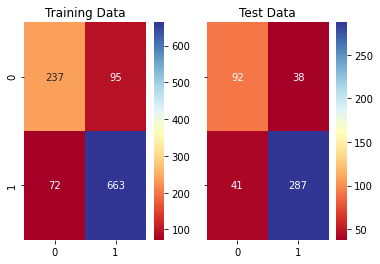

In [275]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,y_train_predict_knn)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,y_test_predict_knn)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [276]:
print(classification_report(y_trains,y_train_predict_knn),'\n');
print(classification_report(y_tests,y_test_predict_knn),'\n');

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458
 



AUC for the Training Data: 0.914
AUC for the Test Data: 0.884


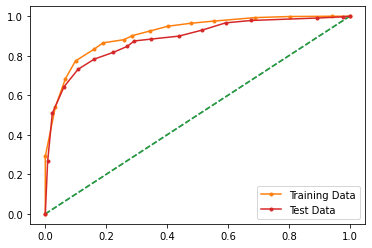

In [277]:
# AUC and ROC for the training data

# calculate AUC
train_auc_knn  = metrics.roc_auc_score(y_trains, ytrain_predict_prob_knn[:,1])
print('AUC for the Training Data: %.3f' % train_auc_knn)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_prob_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_knn = metrics.roc_auc_score(y_tests,ytest_predict_prob_knn[:,1])
print('AUC for the Test Data: %.3f' % test_auc_knn)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# naive model

In [278]:
metrics=classification_report(y_trains,y_train_predict_nb,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_nb=round(df.loc["1"][0],2)
train_recall_nb=round(df.loc["1"][1],2)
train_f1_nb=round(df.loc["1"][2],2)
print ('nb_train_precision ',train_precision_nb)
print ('nb_train_recall ',train_recall_nb)
print ('nb_train_f1 ',train_f1_nb)

nb_train_precision  0.88
nb_train_recall  0.88
nb_train_f1  0.88


In [279]:
metrics=classification_report(y_tests,y_test_predict_nb,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_nb=round(df.loc["1"][0],2)
test_recall_nb=round(df.loc["1"][1],2)
test_f1_nb=round(df.loc["1"][2],2)
print ('nb_test_precision ',test_precision_nb)
print ('nb_test_recall ',test_recall_nb)
print ('nb_test_f1 ',test_f1_nb)

nb_test_precision  0.89
nb_test_recall  0.87
nb_test_f1  0.88


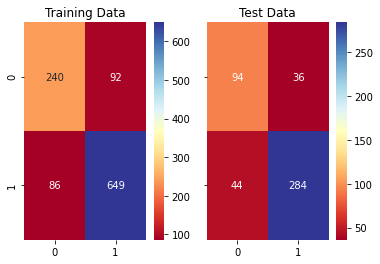

In [282]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,y_train_predict_nb)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,y_test_predict_nb)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [283]:
print(classification_report(y_trains,y_train_predict_nb),'\n');
print(classification_report(y_tests,y_test_predict_nb),'\n');

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067
 

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458
 



AUC for the Training Data: 0.886
AUC for the Test Data: 0.885


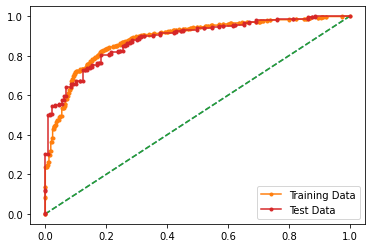

In [284]:
# AUC and ROC for the training data

# calculate AUC
train_auc_nb  = metrics.roc_auc_score(y_trains, ytrain_predict_prob_nb[:,1])
print('AUC for the Training Data: %.3f' % train_auc_nb)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_prob_nb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_nb = metrics.roc_auc_score(y_tests,ytest_predict_prob_nb[:,1])
print('AUC for the Test Data: %.3f' % test_auc_nb)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_nb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Bagging with randomforest

In [285]:
metrics=classification_report(y_trains,y_train_predict_bag,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_bag=round(df.loc["1"][0],2)
train_recall_bag=round(df.loc["1"][1],2)
train_f1_bag=round(df.loc["1"][2],2)
print ('bag_train_precision ',train_precision_bag)
print ('bag_train_recall ',train_recall_bag)
print ('bag_train_f1 ',train_f1_bag)

bag_train_precision  0.85
bag_train_recall  0.92
bag_train_f1  0.89


In [286]:
metrics=classification_report(y_tests,y_test_predict_bag,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_bag=round(df.loc["1"][0],2)
test_recall_bag=round(df.loc["1"][1],2)
test_f1_bag=round(df.loc["1"][2],2)
print ('bag_test_precision ',test_precision_bag)
print ('bag_test_recall ',test_recall_bag)
print ('bag_test_f1 ',test_f1_bag)

bag_test_precision  0.86
bag_test_recall  0.89
bag_test_f1  0.87


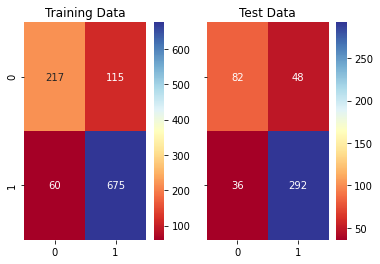

In [289]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,y_train_predict_bag)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,y_test_predict_bag)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [290]:
print(classification_report(y_trains,y_train_predict_bag),'\n');
print(classification_report(y_tests,y_test_predict_bag),'\n');

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       332
           1       0.85      0.92      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067
 

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       130
           1       0.86      0.89      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.76      0.77       458
weighted avg       0.81      0.82      0.81       458
 



AUC for the Training Data: 0.897
AUC for the Test Data: 0.889


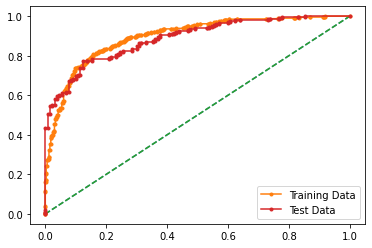

In [291]:
# AUC and ROC for the training data

# calculate AUC
train_auc_bag  = metrics.roc_auc_score(y_trains, ytrain_predict_prob_bag[:,1])
print('AUC for the Training Data: %.3f' % train_auc_bag)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_prob_bag[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_bag = metrics.roc_auc_score(y_tests,ytest_predict_prob_bag[:,1])
print('AUC for the Test Data: %.3f' % test_auc_bag)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_bag[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# AdaBoostClassifier

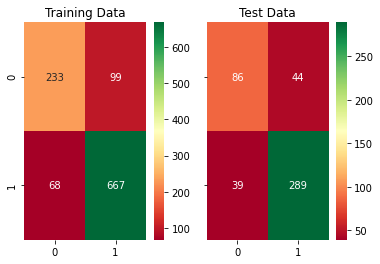

In [293]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains, ytrain_predict_ADa)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests, ytest_predict_ADa)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [294]:
print(classification_report(y_trains, ytrain_predict_ADa),'\n');
print(classification_report(y_tests, ytest_predict_ADa),'\n');

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



AUC for the Training Data: 0.908
AUC for the Test Data: 0.884


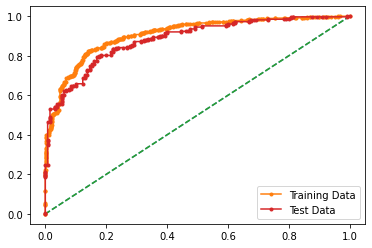

In [295]:
# AUC and ROC for the training data

# calculate AUC
train_auc_ADa = metrics.roc_auc_score(y_trains,ytrain_predict_prob_ADa[:,1])
print('AUC for the Training Data: %.3f' % train_auc_ADa)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains,ytrain_predict_prob_ADa[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_ADa = metrics.roc_auc_score(y_tests,ytest_predict_prob_ADa[:,1])
print('AUC for the Test Data: %.3f' %test_auc_ADa)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_ADa[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [296]:
metrics=classification_report(y_trains, ytrain_predict_ADa,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_ADa=round(df.loc["1"][0],2)
train_recall_ADa=round(df.loc["1"][1],2)
train_f1_ADa=round(df.loc["1"][2],2)
print ('ADa_train_precision ',train_precision_ADa)
print ('ADa_train_recall ',train_recall_ADa)
print ('ADa_train_f1 ',train_f1_ADa)

ADa_train_precision  0.87
ADa_train_recall  0.91
ADa_train_f1  0.89


In [297]:
metrics=classification_report(y_tests, ytest_predict_ADa,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_ADa=round(df.loc["1"][0],2)
test_recall_ADa=round(df.loc["1"][1],2)
test_f1_ADa=round(df.loc["1"][2],2)
print ('ADa_test_precision ',test_precision_ADa)
print ('ADa_test_recall ',test_recall_ADa)
print ('ADatest_f1 ',test_f1_ADa)

ADa_test_precision  0.87
ADa_test_recall  0.88
ADatest_f1  0.87


# Gradient Boosting

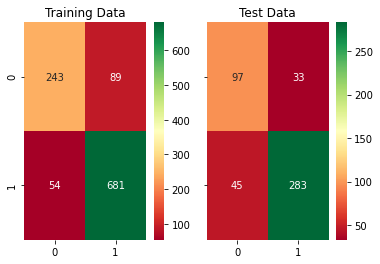

In [299]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains, ytrain_predict_gbcl)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests, ytest_predict_gbcl)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [300]:
print(classification_report(y_trains, ytrain_predict_gbcl),'\n');
print(classification_report(y_tests, ytest_predict_gbcl),'\n');

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       332
           1       0.88      0.93      0.90       735

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.87      0.86      1067
 

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       130
           1       0.90      0.86      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458
 



AUC for the Training Data: 0.934
AUC for the Test Data: 0.899


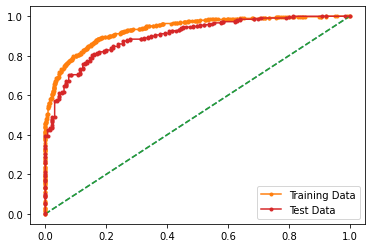

In [301]:
# AUC and ROC for the training data

# calculate AUC
train_auc_gbcl = metrics.roc_auc_score(y_trains,ytrain_predict_prob_gbcl[:,1])
print('AUC for the Training Data: %.3f' % train_auc_gbcl)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains,ytrain_predict_prob_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_gbcl = metrics.roc_auc_score(y_tests,ytest_predict_prob_gbcl[:,1])
print('AUC for the Test Data: %.3f' %test_auc_gbcl)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [302]:
metrics=classification_report(y_trains, ytrain_predict_gbcl,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_gbcl=round(df.loc["1"][0],2)
train_recall_gbcl=round(df.loc["1"][1],2)
train_f1_gbcl=round(df.loc["1"][2],2)
print ('gbcl_train_precision ',train_precision_gbcl)
print ('gbcl_train_recall ',train_recall_gbcl)
print ('gbcl_train_f1 ',train_f1_gbcl)

gbcl_train_precision  0.88
gbcl_train_recall  0.93
gbcl_train_f1  0.9


In [303]:
metrics=classification_report(y_tests, ytest_predict_gbcl,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_gbcl=round(df.loc["1"][0],2)
test_recall_gbcl=round(df.loc["1"][1],2)
test_f1_gbcl=round(df.loc["1"][2],2)
print ('gbcl_test_precision ',test_precision_gbcl)
print ('gbcl_test_recall ',test_recall_gbcl)
print ('gbcl_test_f1 ',test_f1_gbcl)

gbcl_test_precision  0.9
gbcl_test_recall  0.86
gbcl_test_f1  0.88


In [304]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[accuracy_lr_train,train_auc_lr,train_recall_lr,train_precision_lr,train_f1_lr],
        'LR Test':[accuracy_lr_test,test_auc_lr,test_recall_lr,test_precision_lr,test_f1_lr],
        'LDA Train':[accuracy_lda_train,train_auc_lda,train_recall_lda,train_precision_lda,train_f1_lda],
        'LDA Test':[accuracy_lda_test,test_auc_lda,test_recall_lda,test_precision_lda,test_f1_lda],
        'KNN Train':[acc_train_knn,train_auc_knn,train_recall_knn,train_precision_knn,train_f1_knn],
        'KNN Test':[acc_test_knn,test_auc_knn,test_recall_knn,test_precision_knn,test_f1_knn],
        'NB Train':[acc_train_nb,train_auc_nb,train_recall_nb,train_precision_nb,train_f1_nb],
        'NB Test':[acc_test_nb,test_auc_nb,test_recall_nb,test_precision_nb,test_f1_nb],
        'BAGGING Train':[acc_bag_train ,train_auc_bag,train_recall_bag,train_precision_bag,train_f1_bag],
        'BAGGING Test':[acc_bag_test,test_auc_bag,test_recall_bag,test_precision_bag,test_f1_bag],
        'ADA Train':[accuracy_ADa_train,train_auc_ADa,train_recall_ADa,train_precision_ADa,train_f1_ADa],
        'ADA Test':[accuracy_ADa_test,test_auc_ADa,test_recall_ADa,test_precision_ADa,test_f1_ADa],
        'Gradient Train':[accuracy_gbcl_train,train_auc_gbcl,train_recall_gbcl,train_precision_gbcl,train_f1_gbcl],
        'Gradient Test':[accuracy_gbcl_train,test_auc_gbcl,test_recall_gbcl,test_precision_gbcl,test_f1_gbcl]},index=index)   
                     
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,BAGGING Train,BAGGING Test,ADA Train,ADA Test,Gradient Train,Gradient Test
Accuracy,0.84,0.82,0.84,0.82,0.84,0.83,0.83,0.83,0.84,0.82,0.84,0.82,0.87,0.87
AUC,0.89,0.88,0.89,0.88,0.91,0.88,0.89,0.88,0.90,0.89,0.91,0.88,0.93,0.90
Recall,0.91,0.89,0.90,0.88,0.90,0.88,0.88,0.87,0.92,0.89,0.91,0.88,0.93,0.86
Precision,0.86,0.86,0.87,0.87,0.87,0.88,0.88,0.89,0.85,0.86,0.87,0.87,0.88,0.90
F1 Score,0.88,0.88,0.88,0.87,0.89,0.88,0.88,0.88,0.89,0.87,0.89,0.87,0.90,0.88


In [305]:
# Sample voter information
test_sample = [(4,6,10,8,20,11,7,21)]
#Create a DataFrame object
test_df = pd.DataFrame(test_sample, columns = ['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'])

In [306]:
#labour = 1 , conservative = 0

test_predict_lr =  best_model.predict(test_df)
test_predict_lda = best_model_lda.predict(test_df)
test_predict_knn = KNN_model.predict(test_df) 
test_predict_nb = NB_model.predict(test_df)
test_predict_bag = model_bag.predict(test_df)
test_predict_ada = ADa_model.predict(test_df)
test_predict_gb = best_model_ADa.predict(test_df)

In [307]:
outcome_lr = pd.DataFrame(test_predict_lr)
outcome_lr[0]=np.where(outcome_lr[0] == 1," labour party","conservative party")
outcome_lda = pd.DataFrame(test_predict_lda)
outcome_lda[0]=np.where(outcome_lda[0] == 1," labour party","conservative party")
outcome_knn = pd.DataFrame(test_predict_knn)
outcome_knn[0]=np.where(outcome_knn[0] == 1,"labour party","conservative party")
outcome_nb = pd.DataFrame(test_predict_nb)
outcome_nb[0]=np.where(outcome_nb[0] == 1,"labour party","conservative party")
outcome_bag = pd.DataFrame(test_predict_bag)
outcome_bag[0]=np.where(outcome_bag[0] == 1,"labour party","conservative party")
outcome_ada = pd.DataFrame(test_predict_ada)
outcome_ada[0]=np.where(outcome_ada[0] == 1,"labour party","conservative party")
outcome_gb = pd.DataFrame(test_predict_gb)
outcome_gb[0]=np.where(outcome_gb[0] == 1,"labour party","conservative party")


In [308]:
outcome = [outcome_lr,outcome_lda,outcome_knn,outcome_nb,outcome_bag,
               outcome_ada,outcome_gb]
outcome1 = pd.concat(outcome)
outcome1[" Prediction"] = outcome1.copy()
outcome1.drop(0,axis=1,inplace=True)
Models = ['Logistic Regression', 'Linear Discriminant Analaysis ', 'K-Nearest Neighbour',
              'Naive Bayes','Bagging(with Random Forest)', 'Adaptive Boosting ',
              'Gradient Boosting']
outcome1["Model"] = Models
outcome1.set_index("Model", inplace = True)

In [309]:
#Printing the results
print("For the sample voter details provided, the following conclusions are made by the models:\n",outcome1)

For the sample voter details provided, the following conclusions are made by the models:
                                         Prediction
Model                                             
Logistic Regression             conservative party
Linear Discriminant Analaysis   conservative party
K-Nearest Neighbour             conservative party
Naive Bayes                           labour party
Bagging(with Random Forest)     conservative party
Adaptive Boosting               conservative party
Gradient Boosting               conservative party


In [310]:
outcome1

,Prediction
Model,
Logistic Regression,conservative party
Linear Discriminant Analaysis,conservative party
K-Nearest Neighbour,conservative party
Naive Bayes,labour party
Bagging(with Random Forest),conservative party
Adaptive Boosting,conservative party
Gradient Boosting,conservative party


# 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

# 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [1]:
import nltk

In [2]:
from nltk.corpus import inaugural

In [55]:
# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np 
import pandas as pd 

# For Visualisation import ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns

import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import string # this is used for string manipulations
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

In [57]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Speech_1 = inaugural.raw('1941-Roosevelt.txt')
Speech_2 = inaugural.raw('1961-Kennedy.txt')
Speech_3 = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\rmand\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [58]:
Speech_1

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [59]:
Speech_2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [60]:
Speech_3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [61]:
#To find the number of characters,words and sentences:
speech = ['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']
for fileid in speech:
    num_chars = len(inaugural.raw(fileid))
    num_words = len(inaugural.words(fileid))
    num_sents = len(inaugural.sents(fileid))
    print(pd.DataFrame({fileid:[num_chars,num_words,num_sents]},index=['Character','Words','Sentences']))

           1941-Roosevelt.txt
Character                7571
Words                    1536
Sentences                  68
           1961-Kennedy.txt
Character              7618
Words                  1546
Sentences                52
           1973-Nixon.txt
Character            9991
Words                2028
Sentences              69


# 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [62]:
#Add Special character '--' to the existing punctuation
special_characters=['--'] + list(string.punctuation)
# Assign stopwords and special characters to new variable
stop = stopwords.words('english') + special_characters
#Convert all the words to lowercase and store it in a new variables
all_words_speech1 = (w.lower() for w in inaugural.words(fileids='1941-Roosevelt.txt'))
all_words_speech2 = (w.lower() for w in inaugural.words(fileids='1961-Kennedy.txt'))
all_words_speech3 = (w.lower() for w in inaugural.words(fileids='1973-Nixon.txt'))
#Remove stopwords and special characters for all the three speeches
all_words_clean_speech1 = [word for word in all_words_speech1 if word not in stop]
all_words_clean_speech2 = [word for word in all_words_speech2 if word not in stop]
all_words_clean_speech3 = [word for word in all_words_speech3 if word not in stop]

In [73]:
print(all_words_clean_speech1)

['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three', 'score', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slavery', 'become', 'surging', 'wave', 'future', 'freedom', 'eb

In [74]:
print(all_words_clean_speech2)

['vice', 'president', 'johnson', 'mr', 'speaker', 'mr', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman', 'reverend', 'clergy', 'fellow', 'citizens', 'observe', 'today', 'victory', 'party', 'celebration', 'freedom', 'symbolizing', 'end', 'well', 'beginning', 'signifying', 'renewal', 'well', 'change', 'sworn', 'almighty', 'god', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', 'world', 'different', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', 'belief', 'rights', 'man', 'come', 'generosity', 'state', 'hand', 'god', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', 'let', 'word', 'go', 'forth', 'time', 'place', 'friend', 'foe', 'alike', 'torch', 'passed', 'new', 'generation', 'americans', 'born', 'century', 'tempered', 'war'

In [75]:
print(all_words_clean_speech3)

['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', 'met', 'four', 'years', 'ago', 'america', 'bleak', 'spirit', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', 'meet', 'today', 'stand', 'threshold', 'new', 'era', 'peace', 'world', 'central', 'question', 'us', 'shall', 'use', 'peace', 'let', 'us', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', 'let', 'us', 'resolve', 'become', 'time', 'great', 'responsibilities', 'greatly', 'borne', 'renew', 'spirit', 'promise', 'america', 'enter', 'third', 'century', 'nation', 'past', 'year', 'saw', 'far', 'reaching', 'results', 'new', 'policies', 'peace', 'continuing', 'revitalize', 'traditional', 'friendships', 'missions', 'peking', 'moscow', 'able', 'establis

In [87]:
print("The word count before and after the removal of stopwords from Roosevelt speech  ",len(all_words_clean_speech1))
print("The word count before and after the removal of stopwords from Kennedy speech ", len(all_words_clean_speech2))
print("The word count before and after the removal of stopwords from Nixon speech ", len(all_words_clean_speech3))

The word count before and after the removal of stopwords from Roosevelt speech   632
The word count before and after the removal of stopwords from Kennedy speech  697
The word count before and after the removal of stopwords from Nixon speech  836


# 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [66]:
# Most Frequent words in 1941-Roosevelt Speech
df1 = nltk.FreqDist(all_words_clean_speech1)
df1 = pd.DataFrame.from_dict(df1,orient='index')
df1 = df1.rename(columns={0:'Count'})
df1.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1941-Roosevelt Speech")
df1.head(5)

Most Frequent words in 1941-Roosevelt Speech


,Count
nation,12
know,10
spirit,9
democracy,9
life,9


In [67]:
# Most Frequent words in 1961-Kennedy Speech
df2 = nltk.FreqDist(all_words_clean_speech2)
df2 = pd.DataFrame.from_dict(df2,orient='index')
df2 = df2.rename(columns={0:'Count'})
df2.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1961-Kennedy Speech")
df2.head(5)

Most Frequent words in 1961-Kennedy Speech


,Count
let,16
us,12
sides,8
world,8
new,7


In [68]:
# Most Frequent words in 1973-Nixon Speech
df3 = nltk.FreqDist(all_words_clean_speech3)
df3 = pd.DataFrame.from_dict(df3,orient='index')
df3 = df3.rename(columns={'index':'Words',0:'Count'})
df3.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1973-Nixon Speech")
df3.head(5)

Most Frequent words in 1973-Nixon Speech


,Count
us,26
let,22
america,21
peace,19
world,18


# 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [69]:
wc_a = ' '.join(all_words_clean_speech1)
wc_b = ' '.join(all_words_clean_speech2)
wc_c = ' '.join(all_words_clean_speech3)

Word Cloud for 1941-Roosevelt Speech (after cleaning)!!


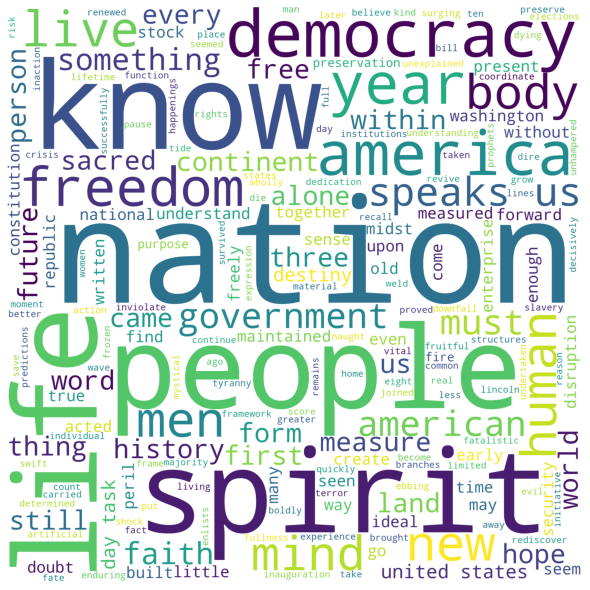

In [70]:
# Word Cloud for 1941-Roosevelt Speech
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1941-Roosevelt Speech (after cleaning)!!")
plt.show()

Word Cloud for 1961-Kennedy Speech (after cleaning)!!


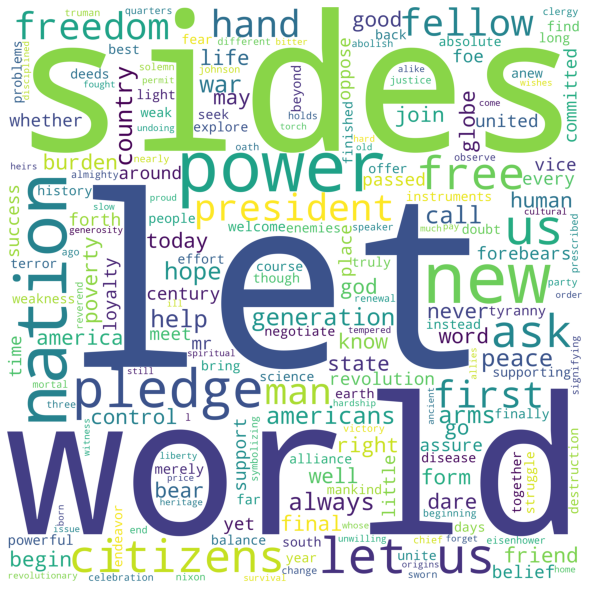

In [71]:
# Word Cloud for 1961-Kennedy Speech
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1961-Kennedy Speech (after cleaning)!!")
plt.show()

Word Cloud for 1973-Nixon Speech (after cleaning)!!


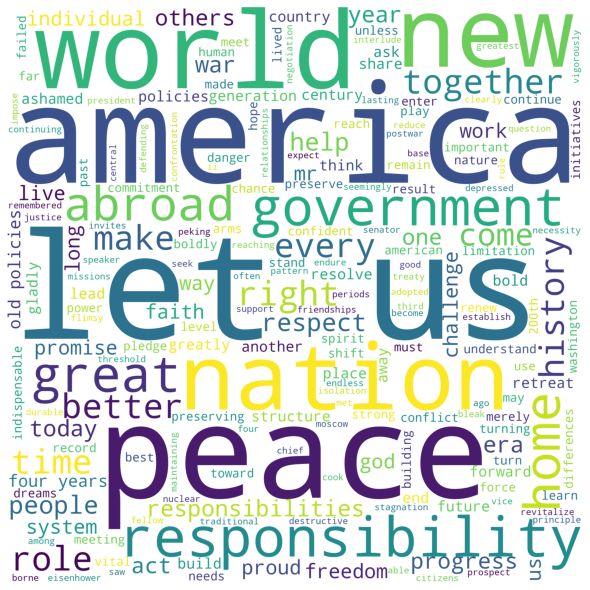

In [72]:
# Word Cloud for 1973-Nixon Speech
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_c) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1973-Nixon Speech (after cleaning)!!")
plt.show()